In [45]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [46]:
import pandas as pd
data = pd.read_csv("data\\titanic.csv")
data[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
# Оставьте в выборке четыре признака: класс пассажира (Pclass), цену билета (Fare), возраст пассажира (Age) и его пол (Sex).
data = data.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], 1)
data = data.dropna(axis=0, how='any')
data[:5]

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [48]:
def converter(sex):
    if sex == 'male':
        return 1
    else:
        return 0
    

In [49]:
data['Sex'] = data['Sex'].apply(converter)
data[:5]

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [50]:
y = data['Survived']
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [51]:
data = data.drop(['Survived'], 1)
data[:5]

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [52]:
clf = DecisionTreeClassifier(random_state=241)
clf.fit(data, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=241, splitter='best')

In [53]:
importances = clf.feature_importances_
importances

array([ 0.14000522,  0.30051221,  0.2560461 ,  0.30343647])

In [54]:
# Вычислите важности признаков и найдите два признака с наибольшей важностью. 
# Их названия будут ответами для данной задачи
# Ответ 1.txt => Sex Fare

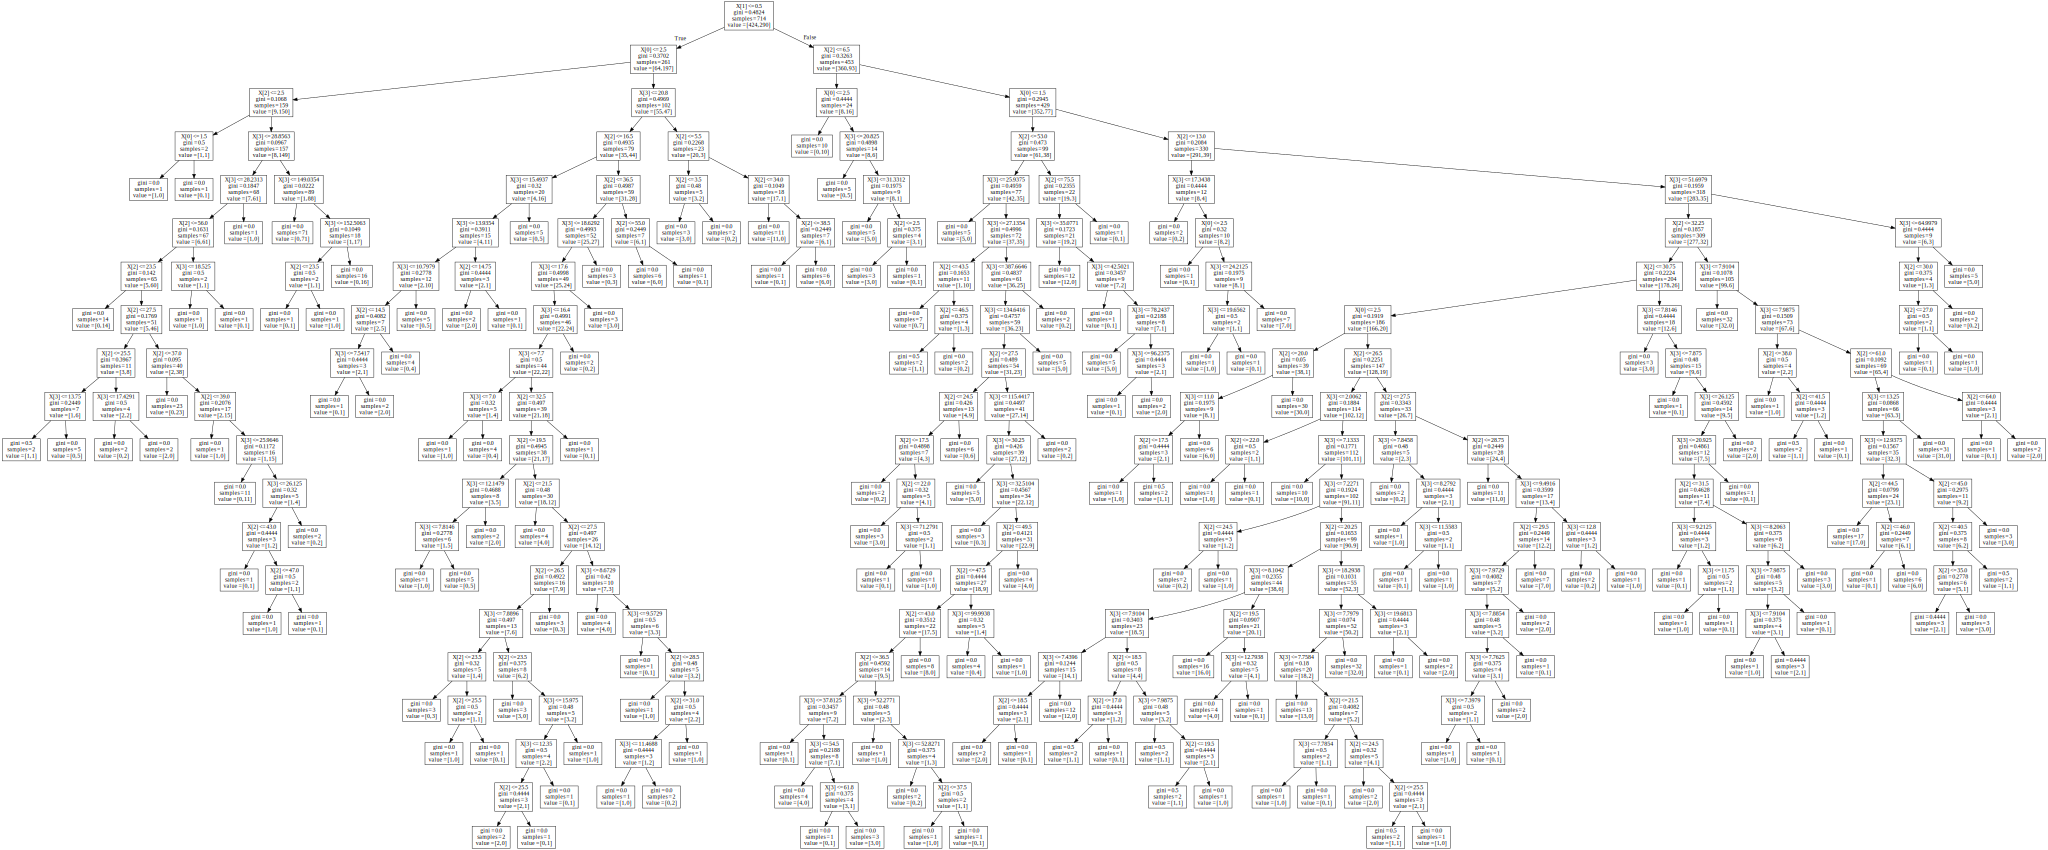

In [55]:
# conda install python-graphviz
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph